### Tutorial showing how to read EBAS NASA Ames files

This low-level tutorial shows how to read an EBAS NASA Ames file using the class [EbasNasaAmesFile](https://pyaerocom.met.no/api.html?highlight=ebasnasaamesfile#pyaerocom.io.ebas_nasa_ames.EbasNasaAmesFile) of pyaerocom and how to access the import data and metadata. 

**NOTE**: variable names and names of metadata attributes below use the EBAS conventions and **not the AeroCom naming conventions**, since the purpose of the `EbasNasaAmesFile` reading routine is to solely import the content of the original data files (provided by EBAS) into a python interface. If you intend to use EBAS data for AeroCom purposes (e.g. model intercomparison), please use the [ReadEbas](https://pyaerocom.met.no/api.html?highlight=readebas#pyaerocom.io.read_ebas.ReadEbas) routine (or the [ReadUngridded](https://pyaerocom.met.no/api.html?highlight=readebas#module-pyaerocom.io.readungridded) factory class) which is doing the mapping to AeroCom naming conventions.

Please see [here](https://ebas-submit.nilu.no/Submit-Data/Getting-started) for information related to the EBAS NASA Ames file format.

In [1]:
import pyaerocom as pya
import glob

Initating pyaerocom configuration


Checking database access...


Checking access to: /lustre/storeA


Access to lustre database: True


Init data paths for lustre


Expired time: 0.022 s


In [2]:
ebasdir = pya.const.EBASMC_DATA_DIR
ebasdir

'/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/'

In [3]:
files = glob.glob('{}DE0043G*2010*nephelometer*lev2.nas'.format(ebasdir))

In [4]:
print('No. of files found: {}'.format(len(files)))

No. of files found: 2


In [5]:
files[0]

'/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/DE0043G.20100201000000.20150304123917.nephelometer..pm10.11mo.1h.DE09L_TSI_Neph_3563.DE09L_scatt_NEPH.lev2.nas'

Read the first file that was found:

In [6]:
mc = pya.io.EbasNasaAmesFile(file=files[0],
                             only_head=False,          #set True if you only want to import header
                             replace_invalid_nan=True, #replace invalid values with NaNs
                             convert_timestamps=True,  #compute datetime64 timestamps from numerical values
                             decode_flags=True)        #decode all flags (e.g. 0.111222333 -> 111 222 333)
                             
print(mc)

Pyaerocom EbasNasaAmesFile
--------------------------

num_head_lines: 91
num_head_fmt: 1001
data_originator: Flentje, Harald
sponsor_organisation: DE09L, Deutscher Wetterdienst, DWD, Met. Obs., Hohenspeissenberg, , 82283, Hohenspeissenberg, Germany
submitter: Flentje, Harald
project_association: ACTRIS EMEP GAW-WDCA
vol_num: 1
vol_totnum: 1
ref_date: 2010-01-01T00:00:00
revision_date: 2015-03-04T00:00:00
freq: 0.041667
descr_time_unit: days from file reference point
num_cols_dependent: 23
mul_factors (list, 23 items): [1.00, 1.00, ..., 1.00, 1.00]
vals_invalid (list, 23 items): [1000, 9999.0, ..., 9999.999999, 10.00]
descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=23, 
   EbasColDef: name=endtime, unit=days, is_var=False, is_flag=False, flag_col=23, 
   EbasColDef: name=pressure, unit=hPa, is_var=True, is_flag=F

The NASA Ames files are strucured in the same way as they are represented by in the instance of the EbasNasaAmesFile class. 

- A header with global metadata
- One row that specifies multiplication factors for each data column (``mul_factors``)
- One row that specifies NaN-equivalent values for each data column (``vals_invalid``)
- A number of rows specifying metainformation for each data column in the file (i.e. 12 rows, if the data has 12 columns)
- Dataset specific metadata 
- Data block: rows are timestamps, columns are different columns specified in the header (cf. 2 points above)

    - Represented by 2D numpy array (``data`` attribute) where first index is row and second index is column
    

For details related to the file format [see here](https://ebas-submit.nilu.no/Submit-Data/Data-Reporting/Templates/Category/Aerosol/Aerosol-Optical-Depth).

In [7]:
print(mc.shape)

(8016, 24)


#### Data array

The data is imported as a 2D numpy array which is accessible via the `data` attribute:

In [8]:
mc.data

array([[3.10000000e+01, 3.10416660e+01,            nan, ...,
                   nan,            nan, 9.99000000e-01],
       [3.10416670e+01, 3.10833330e+01,            nan, ...,
                   nan,            nan, 9.99000000e-01],
       [3.10833330e+01, 3.11249990e+01,            nan, ...,
                   nan,            nan, 9.99000000e-01],
       ...,
       [3.64875000e+02, 3.64916666e+02, 9.04000000e+02, ...,
        1.35433110e+01, 1.62446480e+01, 1.00000000e-01],
       [3.64916667e+02, 3.64958333e+02, 9.04000000e+02, ...,
        1.13367710e+01, 1.42932090e+01, 1.00000000e-01],
       [3.64958333e+02, 3.64999999e+02, 9.03000000e+02, ...,
        1.13635590e+01, 1.40839410e+01, 1.00000000e-01]])

The first index corresponds to the individual measurements (rows in file) and the second index corresponds to the individual columns that are stored in the file. 

#### Column information

Detailed information about each column can be accessed via the ``var_defs`` attribute, the first two columns are always the start and stop timestamps: 

In [9]:
mc.var_defs[0]

EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=23, 

In [10]:
mc.var_defs[1]

EbasColDef: name=endtime, unit=days, is_var=False, is_flag=False, flag_col=23, 

After the start / stop columns follow the individual data columns.

In [11]:
mc.var_defs[2]

EbasColDef: name=pressure, unit=hPa, is_var=True, is_flag=False, flag_col=23, location=instrument internal, statistics=arithmetic mean, matrix=instrument, detection_limit=, detection_limit_expl.=, measurement_uncertainty=, measurement_uncertainty_expl.=, 

In [12]:
mc.var_defs[3]

EbasColDef: name=relative_humidity, unit=%, is_var=True, is_flag=False, flag_col=23, location=instrument internal, statistics=arithmetic mean, matrix=instrument, detection_limit=, detection_limit_expl.=, measurement_uncertainty=, measurement_uncertainty_expl.=, 

In [13]:
mc.var_defs[4]

EbasColDef: name=temperature, unit=K, is_var=True, is_flag=False, flag_col=23, location=instrument internal, statistics=arithmetic mean, matrix=instrument, detection_limit=, detection_limit_expl.=, measurement_uncertainty=, measurement_uncertainty_expl.=, 

In [14]:
mc.var_defs[5]

EbasColDef: name=aerosol_light_backscattering_coefficient, unit=1/Mm, is_var=True, is_flag=False, flag_col=23, wavelength=450.0 nm, statistics=arithmetic mean, 

In addition to the data columns in the files (such as time stamps, or measured values of a certain variable) there is **at least one** flag column in the data array and each data column has assigned one flag column (cf. output above where the index of the flag column for each data column is provided `flag_col=23`, i.e. column 23 is the flag column assigned to each of the 5 data columns that were displayed exemplary above:

In [15]:
mc.var_defs[23]

EbasColDef: name=numflag, unit=no unit, is_var=False, is_flag=True, flag_col=None, 

The ``is_var`` attribute specifies, whether this column contains actual variable data or if it is a flag column. A NASA Ames file can have one or more flag columns that can be used to identify valid or invalid measurments. Each flag in a flag column comprises a floating point number that has encoded up to 3 3-digit numerical flags which are specified here:

https://github.com/metno/pyaerocom/blob/master/pyaerocom/data/ebas_flags.csv

More info about the flags follows below. You can see, that the column 4 printed above has assigned column 12 (index 11) as flag column.

If you want to see an overview of all available columns in the file you may use the following command:

In [16]:
mc.print_col_info()

Column 0
Pyaerocom EbasColDef
--------------------
name: starttime
unit: days
is_var: False
is_flag: False
flag_col: 23

Column 1
Pyaerocom EbasColDef
--------------------
name: endtime
unit: days
is_var: False
is_flag: False
flag_col: 23

Column 2
Pyaerocom EbasColDef
--------------------
name: pressure
unit: hPa
is_var: True
is_flag: False
flag_col: 23
location: instrument internal
statistics: arithmetic mean
matrix: instrument
detection_limit: 
detection_limit_expl.: 
measurement_uncertainty: 
measurement_uncertainty_expl.: 

Column 3
Pyaerocom EbasColDef
--------------------
name: relative_humidity
unit: %
is_var: True
is_flag: False
flag_col: 23
location: instrument internal
statistics: arithmetic mean
matrix: instrument
detection_limit: 
detection_limit_expl.: 
measurement_uncertainty: 
measurement_uncertainty_expl.: 

Column 4
Pyaerocom EbasColDef
--------------------
name: temperature
unit: K
is_var: True
is_flag: False
flag_col: 23
location: instrument internal
statistics: ari

You can see that all variable columns were assigned the same flag column, since there is only one flag column at the end (index 23). This would be different if there were multiple flag columns (e.g. one for each variable).

#### Access flag information

You can access the flags for each column using the ``flag_col_info`` attribute of the file (and the key of the respective flag column, that you want to access, here->11).

In [17]:
flagcol = mc.flag_col_info[23]
flagcol

The raw flags can be accessed via:

In [18]:
flagcol.raw_data

array([0.999, 0.999, 0.999, ..., 0.1  , 0.1  , 0.1  ])

And the processed flags are in stored in a (Nx3) numpy array where N is the total number of timestamps.

In [19]:
flagcol.decoded

array([[999,   0,   0],
       [999,   0,   0],
       [999,   0,   0],
       ...,
       [100,   0,   0],
       [100,   0,   0],
       [100,   0,   0]])

For instance, access the flags of the 5 timestamp:

In [20]:
flagcol.decoded[4]

array([999,   0,   0])

This timestamp contains 1 (of the possible up to 3) flags: 999.

Validity of a combination of the flags can be directly accessed via:

In [21]:
flagcol.valid[4]

False

This flag (999) evaluates to an invalid measurement. Looking into [the flag definition file](https://github.com/metno/pyaerocom/blob/master/pyaerocom/data/ebas_flags.csv) we see that these two flags have the following meaning:

- 999,'Missing measurement, unspecified reason','M'

where the last string specifies if this flag is valid (V) or invalid (I) or missing (M).

#### Convert object to pandas Dataframe

In [22]:
df = mc.to_dataframe()
df.head()

,starttime_days,endtime_days,pressure_hPa_instrument_arithmetic mean,relative_humidity_%_instrument_arithmetic mean,temperature_K_instrument_arithmetic mean,aerosol_light_backscattering_coefficient_1/Mm_450.0nm_arithmetic mean,aerosol_light_backscattering_coefficient_1/Mm_450.0nm_percentile:15.87,aerosol_light_backscattering_coefficient_1/Mm_450.0nm_percentile:84.13,aerosol_light_backscattering_coefficient_1/Mm_550.0nm_arithmetic mean,aerosol_light_backscattering_coefficient_1/Mm_550.0nm_percentile:15.87,...,aerosol_light_scattering_coefficient_1/Mm_450.0nm_arithmetic mean,aerosol_light_scattering_coefficient_1/Mm_450.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_450.0nm_percentile:84.13,aerosol_light_scattering_coefficient_1/Mm_550.0nm_arithmetic mean,aerosol_light_scattering_coefficient_1/Mm_550.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_550.0nm_percentile:84.13,aerosol_light_scattering_coefficient_1/Mm_700.0nm_arithmetic mean,aerosol_light_scattering_coefficient_1/Mm_700.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_700.0nm_percentile:84.13,numflag_no unit
2010-02-01 00:29:59,31.000000,31.041666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999
2010-02-01 01:29:59,31.041667,31.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999
2010-02-01 02:29:59,31.083333,31.124999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999
2010-02-01 03:29:59,31.125000,31.166666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999
2010-02-01 04:29:59,31.166667,31.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999


##### You may also apply selection constraints when converting to a DataFrame

In [23]:
scattering = mc.to_dataframe('aerosol_light_scattering_coefficient', statistics='arithmetic mean')
scattering

,aerosol_light_scattering_coefficient_1/Mm_450.0nm_arithmetic mean,aerosol_light_scattering_coefficient_1/Mm_550.0nm_arithmetic mean,aerosol_light_scattering_coefficient_1/Mm_700.0nm_arithmetic mean
2010-02-01 00:29:59,NaN,NaN,NaN
2010-02-01 01:29:59,NaN,NaN,NaN
2010-02-01 02:29:59,NaN,NaN,NaN
2010-02-01 03:29:59,NaN,NaN,NaN
2010-02-01 04:29:59,NaN,NaN,NaN
...,...,...,...
2010-12-31 19:29:59,29.312950,19.707840,13.09690
2010-12-31 20:29:59,28.166000,19.270330,11.51522
2010-12-31 21:29:59,36.854919,25.116589,14.89398
2010-12-31 22:29:59,30.724499,21.249210,12.81499


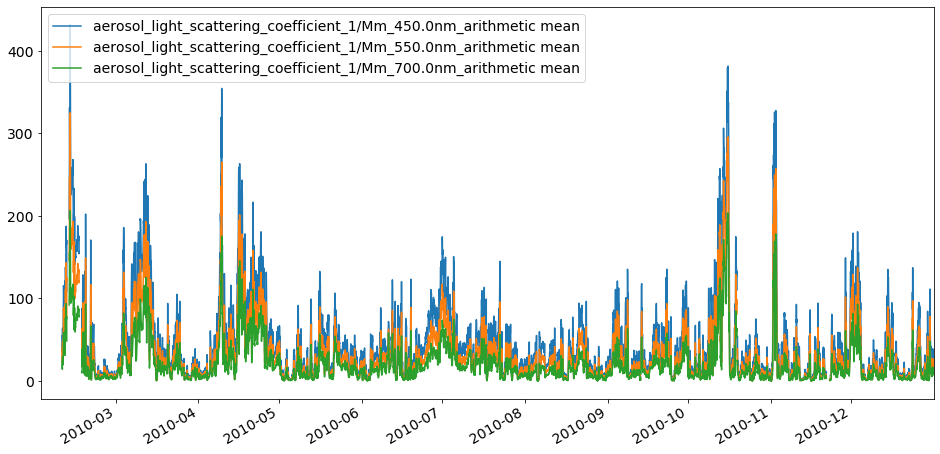

In [24]:
scattering.plot(figsize=(16,8))